In [259]:
start_yr = 1951
end_yr = 2019

In [260]:
import imdlib as imd
import xarray as xr
import pandas as pd
import numpy as np
variable = 'tmax' 
data_max = imd.get_data(variable, start_yr, end_yr,fn_format='yearwise')
d_temp_max = data_max.get_xarray()

Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloading: maxtemp for year 1977
Downloading: maxtemp for year 1978
Downloading: maxtemp

In [272]:
elevations=pd.read_csv("imd_srtm.csv")
elevations = elevations.set_index(['lat', 'lon'])
df=elevations.to_xarray()

merged_data_max=xr.merge([d_temp_max, df],join='inner')

In [273]:
H = merged_data_max.to_dataframe()  # CHANGE ELEVATIONS IN THE FOLLOWIING TWO LINES

H300=H[H.median_elevation >1000] #tmax for >1000 m
H162=H[H.median_elevation <162] #tmax for <162 m

In [274]:
H300=H300.round(2)  #Rounding the values to 2 decimals so that we can replace 99 with nan
H162=H162.round(2)

H300.replace(99.90,np.nan, inplace=True)   #replace 99.90 with nan to remove the respective rows later on
H162.replace(99.90,np.nan, inplace=True)

H300.dropna(inplace=True)  #removing all the nan's
H162.dropna(inplace=True)

In [275]:
H162.reset_index(inplace=True)   
H300.reset_index(inplace=True)

In [276]:
H300['year']=pd.DatetimeIndex(H300['time']).year
H300['month']=pd.DatetimeIndex(H300['time']).month
H300['day']=pd.DatetimeIndex(H300['time']).day 

In [277]:
H162['year']=pd.DatetimeIndex(H162['time']).year
H162['month']=pd.DatetimeIndex(H162['time']).month
H162['day']=pd.DatetimeIndex(H162['time']).day        

In [278]:
H300=H300[H300['month'] > 3]
H300=H300[H300['month'] < 6] 

In [279]:
H162=H162[H162['month'] > 3]
H162=H162[H162['month'] < 6]     

In [304]:
k=H162     #Change Here for H162/H300

In [315]:
k1=k.loc[(k["month"]==4)&(k["day"]>14)]
k2=k.loc[(k["month"]==5)&(k["day"]<15)]
k = k1.append(k2)

In [317]:
k.head(2)

,lat,lon,time,tmax,median_elevation,year,month,day
104,9.5,76.5,1951-04-15,29.06,5.0,1951,4,15
105,9.5,76.5,1951-04-16,28.76,5.0,1951,4,16


## Part 1: Finding percentiles 

In [320]:
df = k["year"].unique()
b = pd.DataFrame({'year': df[:]})

In [321]:
b['99.4']=[0]*b.shape[0]
b['99.9']=[0]*b.shape[0]
b['99.99']=[0]*b.shape[0]


In [322]:
c=0
for i in range(start_yr,end_yr+1):
    a=k[k['year']==i]
    b.iloc[c,1]= a['tmax'].quantile(0.994)
    b.iloc[c,2]= a['tmax'].quantile(0.999)
    b.iloc[c,3]= a['tmax'].quantile(0.9999)
    c+=1

In [323]:
b

,year,99.4,99.9,99.99
0,1951,42.99030,43.85202,44.098409
1,1952,42.82818,43.41015,44.084873
2,1953,41.40030,41.86207,41.962803
3,1954,41.48060,41.86207,41.962803
4,1955,43.12454,44.19823,44.400404
...,...,...,...,...
64,2015,43.02000,43.89030,44.322020
65,2016,43.79606,44.36005,44.832449
66,2017,44.07606,45.11611,45.392803
67,2018,43.38000,44.08603,44.214045


<AxesSubplot:xlabel='year', ylabel='99.4'>

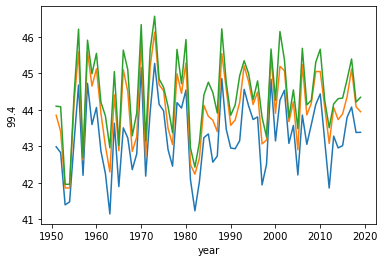

In [324]:
import seaborn as sns
sns.lineplot(x=b['year'],y=b['99.4'])
#sns.regplot(x=b['year'],y=b['99.4'],ci=None)
sns.lineplot(x=b['year'],y=b['99.9'])
#sns.regplot(x=b['year'],y=b['99.9'],ci=None)
sns.lineplot(x=b['year'],y=b['99.99'])
#sns.regplot(x=b['year'],y=b['99.99'],ci=None)

## Part 2: Finding 4 max temp in a day and then getting avg of month  


In [336]:
#k.nlargest(4, ['tmax'])['tmax'].mean() #testing for daily 4 max avg 

In [326]:
dates = k["time"].unique()

In [327]:
b = pd.DataFrame({'date': dates[:]})
b['year']=pd.DatetimeIndex(b['date']).year
b['month']=pd.DatetimeIndex(b['date']).month
b['day']=pd.DatetimeIndex(b['date']).day
b['temp']=[0]*len(b)
#b['count(days)']=[1]*(dates.size)
b.head(1)

,date,year,month,day,temp
0,1951-04-15,1951,4,15,0


In [328]:
#b.sort_values(by=["date"],inplace=True)

In [329]:
for i in range(start_yr,end_yr+1):
    a1=k[k['year']==i]
    for j in range(1,32):
        a2=a1[a1['day']==j]
        #a2.nlargest(4, ['tmax'])['tmax'].mean()
        b.loc[(b['year'] == i) & (b['day'] == j), 'temp'] = a2.nlargest(4, ['tmax'])['tmax'].mean()

In [330]:
a=b.groupby('year').mean()

In [331]:
a.drop(['month', 'day'], axis = 1, inplace = True) 

In [332]:
a.reset_index(inplace=True)  # only for plotting as a is having year as index here

<AxesSubplot:xlabel='year', ylabel='temp'>

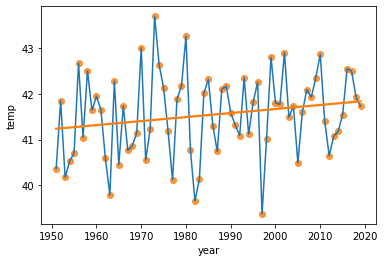

In [333]:
import seaborn as sns
sns.lineplot(x=a['year'],y=a['temp'])
sns.regplot(x=a['year'],y=a['temp'], ci=None)

In [334]:
a

,year,temp
0,1951,40.363250
1,1952,41.845417
2,1953,40.170667
3,1954,40.520917
4,1955,40.704833
...,...,...
64,2015,41.543833
65,2016,42.549833
66,2017,42.494583
67,2018,41.926250


In [335]:
b

,date,year,month,day,temp
0,1951-04-15,1951,4,15,40.2300
1,1951-04-16,1951,4,16,41.0375
2,1951-04-17,1951,4,17,41.1150
3,1951-04-18,1951,4,18,40.9775
4,1951-04-19,1951,4,19,40.6575
...,...,...,...,...,...
2065,2019-05-11,2019,5,11,41.4200
2066,2019-05-12,2019,5,12,41.7950
2067,2019-05-13,2019,5,13,40.9075
2068,2019-05-14,2019,5,14,40.3800
